In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC

In [3]:
inspections = pd.read_csv('C:\\Users\\sambo\\Downloads\\final_engineered_features.csv')

C:\Users\sambo\AppData\Local\Temp\ipykernel_87332\2659653593.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  inspections = pd.read_csv('C:\\Users\\sambo\\Downloads\\final_engineered_features.csv')


In [4]:
inspections.sample(10)

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,...,FMD-145 Date,recalled_bool,classification_flag,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
64305,2518760,Sanofi Pasteur Inc.,Swiftwater,Pennsylvania,18370,United States,2009,595048,No,2009-04-21,...,-,0,1,2009,4,1,2,17,Spring,-1.0
195668,3005352586,VALSAD JILLA FAL ANE SHAKBHAJI SAHAKARI SANGH LTD,Gandevi,-,-,India,2012,793605,No,2012-07-17,...,2012-10-18 00:00:00,0,1,2012,7,1,3,29,Summer,-1.0
231357,3008294390,"Bridgetown Natural Foods, LLC",Portland,Oregon,97266,United States,2016,955152,Yes,2015-12-10,...,-,0,1,2015,12,3,4,50,Winter,1400.0
207695,3006426779,"Staubach Barror Water Systems Inc., DBA Aqua Pure",Schenectady,New York,12306,United States,2016,958070,Yes,2016-01-08,...,2016-02-19 00:00:00,0,1,2016,1,4,1,1,Winter,-1.0
225643,3007834763,Artistic Sweets,Hermitage,Tennessee,37076,United States,2012,750351,No,2011-10-18,...,-,0,0,2011,10,1,4,42,Fall,0.0
144113,3003568243,"CP Kelco US, Inc",San Diego,California,92113,United States,2024,1246141,No,2024-07-08,...,2024-09-06 00:00:00,0,0,2024,7,0,3,28,Summer,-1.0
218499,3007223928,Antaria Pty. Limited,Welshpool,-,-,Australia,2017,1025672,No,2017-09-07,...,2018-01-12 00:00:00,0,1,2017,9,3,3,36,Fall,-1.0
290813,3013326947,Arihiro Kiyosue,Chuo,-,-,Japan,2017,1027896,No,2017-06-02,...,-,0,0,2017,6,4,2,22,Summer,-1.0
29063,1625240,"Ron's Home Style Foods, Inc.",Houston,Texas,77085,United States,2010,632801,Yes,2009-12-04,...,-,1,1,2009,12,4,4,49,Winter,-1.0
260732,3010148608,"Nikay Bio-Proceso, SRL",San Cristobal,-,-,Dominican Republic (the),2015,927168,Yes,2015-05-22,...,2015-08-14 00:00:00,0,1,2015,5,4,2,21,Spring,-1.0


In [5]:
inspections = inspections[inspections['Product Type'] == 'Food/Cosmetics']

In [6]:
X = inspections.drop(['recalled_bool','classification_flag','Legal Name','City','Zip','FEI Number','Additional Details','FMD-145 Date','Inspection ID','Inspection End Date'], axis=1) 
y = inspections['recalled_bool']

In [7]:
X.sample(5)

,State,Country/Area,Fiscal Year,Posted Citations,Classification,Project Area,Product Type,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
195730,Iowa,United States,2016,No,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,2016,8,0,3,34,Summer,-1.0
133341,Texas,United States,2020,Yes,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,2020,8,4,3,35,Summer,624.0
243759,Ohio,United States,2017,No,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,2016,10,2,4,42,Fall,0.0
60900,New York,United States,2009,Yes,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,2009,5,1,2,19,Spring,-1.0
34326,Colorado,United States,2011,No,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,2011,2,2,1,6,Winter,225.0


In [8]:
categorical_cols = ['Classification', 'Project Area', 'Product Type', 'State', 'Country/Area', 'inspection_season']
X = pd.get_dummies(X, columns = categorical_cols, drop_first = True, dtype = int)
X['Posted Citations'] = X['Posted Citations'].notnull().astype(int)

In [9]:
X.sample(10)

,Fiscal Year,Posted Citations,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,days_since_last_inspection,Classification_Official Action Indicated (OAI),Classification_Voluntary Action Indicated (VAI),...,Country/Area_United Kingdom,Country/Area_United States,Country/Area_Uruguay,Country/Area_Vanuatu,Country/Area_Venezuela,Country/Area_Vietnam,Country/Area_Western Samoa,inspection_season_Spring,inspection_season_Summer,inspection_season_Winter
81731,2010,1,2010,4,2,2,15,271.0,0,1,...,0,1,0,0,0,0,0,1,0,0
313318,2025,1,2025,1,2,1,5,-1.0,0,0,...,0,1,0,0,0,0,0,0,0,1
210194,2023,1,2022,11,2,4,45,-1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
44011,2023,1,2022,12,2,4,52,4439.0,0,0,...,0,1,0,0,0,0,0,0,0,1
50822,2012,1,2012,3,4,1,11,717.0,0,0,...,0,1,0,0,0,0,0,1,0,0
175303,2010,1,2010,6,2,2,23,-1.0,0,1,...,0,1,0,0,0,0,0,0,1,0
75185,2020,1,2019,10,3,4,43,-1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
101876,2016,1,2016,6,3,2,22,-1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
208665,2012,1,2011,10,3,4,43,-1.0,0,1,...,0,1,0,0,0,0,0,0,0,0
53632,2011,1,2010,12,4,4,48,0.0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


# n_estimators = 100: .945 or .946 (.903 or .904)
# max_leaf_nodes = 10: .94999 (.911 or .912)
# bootstrap=False: recall (.075); accuracy (.895)

In [19]:
len(y_train)

138795

In [21]:
scores = cross_val_score(
    classifier, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.55077632, 0.54274289, 0.55264959, 0.55405454, 0.54331928])

In [24]:
avg = 0
for i in range(len(scores)):
    avg += scores[i] * (1/len(scores)) 
print(avg)

0.8950250369249613


In [114]:
1 - sum(y_train)/len(y_train)

0.9115097806116935

In [110]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=74), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 0.911581829316618

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=74),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [17]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [102]:
classifier_final = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 10, bootstrap = False, random_state = 74)
classifier_final.fit(X_train, y_train)
# y_pred = classifier_final.predict(X_test)

RandomForestClassifier(bootstrap=False, max_leaf_nodes=10, random_state=74)

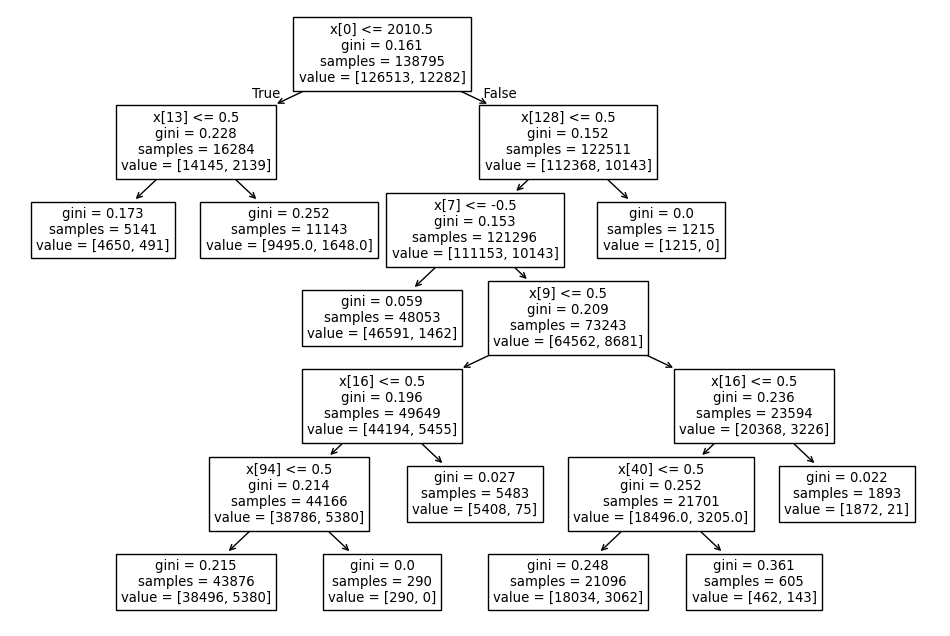

In [103]:
# Extract an individual decision tree from the Random Forest
individual_tree = classifier_final.estimators_[0]  # Get the first tree 

# Visualize the decision tree using Matplotlib's plot_tree method
plt.figure(figsize=(12, 8))
plot_tree(individual_tree)
plt.show()

In [1]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

NameError: name 'accuracy_score' is not defined